In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display



%matplotlib inline
sns.set_style('darkgrid')

In [49]:
expedia_df_ol = pd.read_csv('expedia_cleaned.csv')

In [50]:
expedia_df_ol.head()

,Name,NumOfWeekendDays,Nights,Score,Rating,Review,Refundable,Price,WebIndex,Includes_Airport shuttle included,...,District_Williamsburg,SnapShotMonth,SnapShotDay,CheckinMonth,CheckinDay,CheckoutMonth,CheckoutDay,TTT,LOS,TotalPrice
0,The Hoxton Williamsburg,0,1.0,9.0,9.0,1000,1,347,1,0,...,1,3.0,1.0,3.0,2.0,3.0,3.0,1.0,2.0,347.0
1,Hampton Inn Manhattan/Times Square Central,0,1.0,8.6,8.0,1338,1,381,2,0,...,0,3.0,1.0,3.0,2.0,3.0,3.0,1.0,2.0,381.0
2,Cachet Boutique New York,0,1.0,7.6,6.0,1002,0,287,3,0,...,0,3.0,1.0,3.0,2.0,3.0,3.0,1.0,2.0,287.0
3,"PUBLIC, an Ian Schrager hotel",0,1.0,8.0,7.0,1447,0,446,4,0,...,0,3.0,1.0,3.0,2.0,3.0,3.0,1.0,2.0,446.0
4,Hampton Inn NY-JFK,0,1.0,7.6,6.0,1216,0,181,5,0,...,0,3.0,1.0,3.0,2.0,3.0,3.0,1.0,2.0,181.0


In [51]:
expedia_df_ol.shape

(40515, 36)

In [52]:
## IQR = Q3 - Q1
## Price
price_q1 , price_q3 = np.percentile(expedia_df_ol['TotalPrice'],[25,75])
priceIQR = (price_q3 - price_q1)
priceTUK = price_q3 + (1.5 * (priceIQR))

In [53]:
expedia_df = expedia_df_ol[~(expedia_df_ol['TotalPrice'] > (priceTUK))]

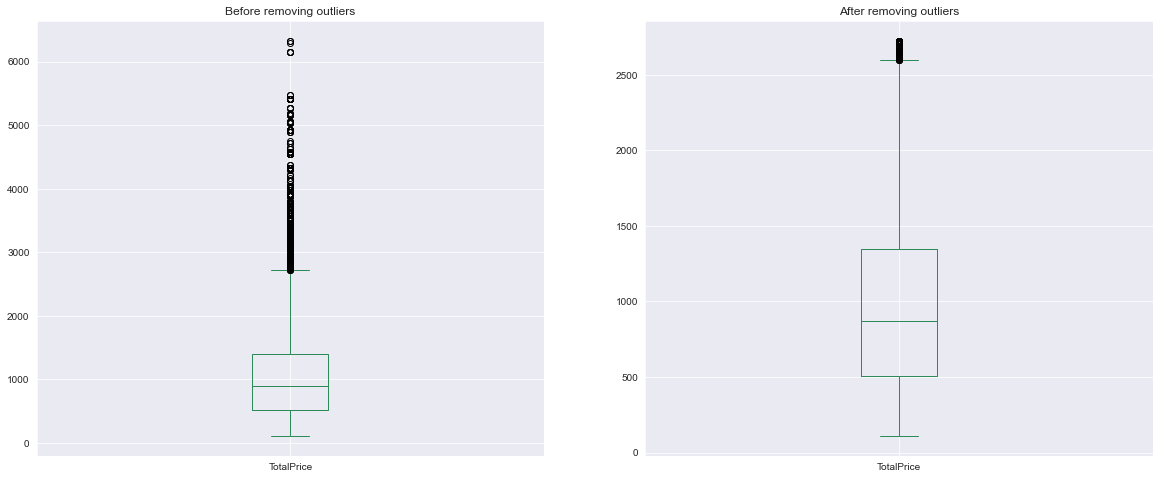

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
expedia_df_ol['TotalPrice'].plot(kind='box', title='Price',color='seagreen',ax=ax1)
ax1.title.set_text('Before removing outliers')
expedia_df['TotalPrice'].plot(kind='box', title='Price',color='seagreen',ax=ax2)
ax2.title.set_text('After removing outliers')
plt.show()

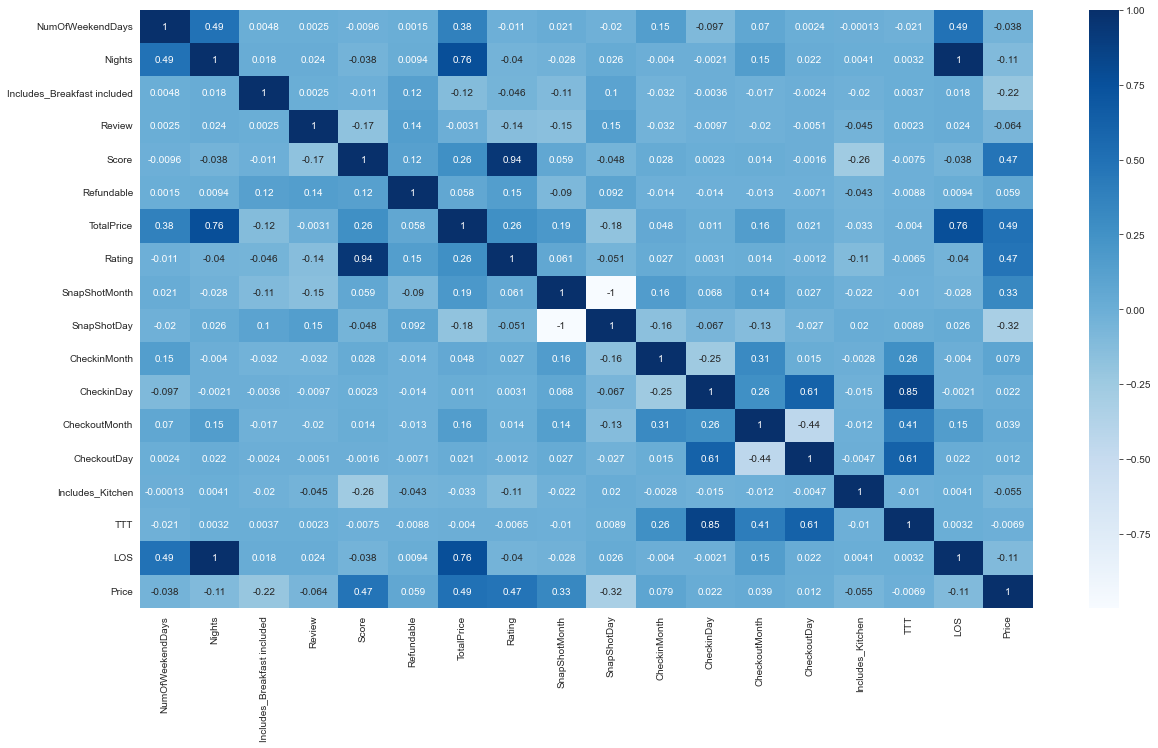

In [55]:
plt.figure(figsize=(20,11))
sns.heatmap(expedia_df[['NumOfWeekendDays','Nights','Includes_Breakfast included','Review',
                             'Score','Refundable','TotalPrice','Rating','SnapShotMonth',
                             'SnapShotDay','CheckinMonth','CheckinDay','CheckoutMonth','CheckoutDay','Includes_Kitchen',
                             'TTT','LOS','Price']].corr(),annot=True,cmap='Blues')
plt.show()

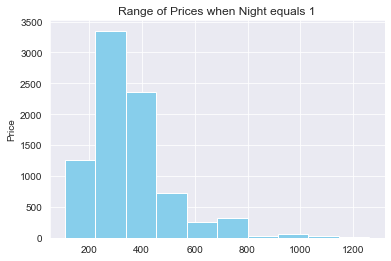

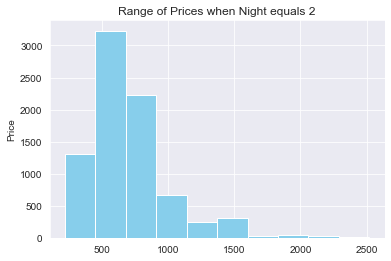

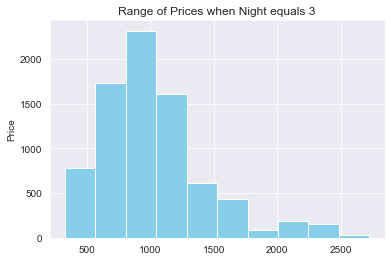

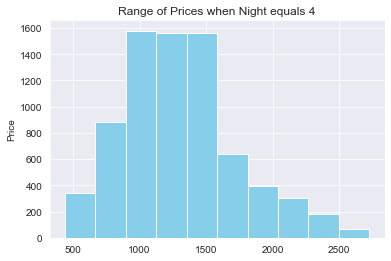

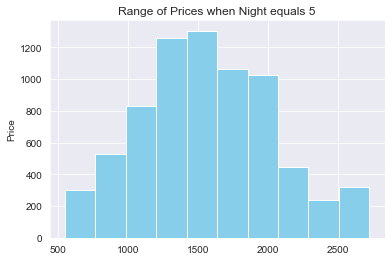

In [56]:
for night in range(1, 6):
    # create boolean index based on Night column
    night_index = expedia_df['Nights'] == night

    # select Price values where Night equals current value
    prices_night = expedia_df.loc[night_index, 'TotalPrice']

    # create boxplot
    plt.hist(prices_night,color='skyblue')
    plt.title(f"Range of Prices when Night equals {night}")
    plt.ylabel('Price')
    plt.show()

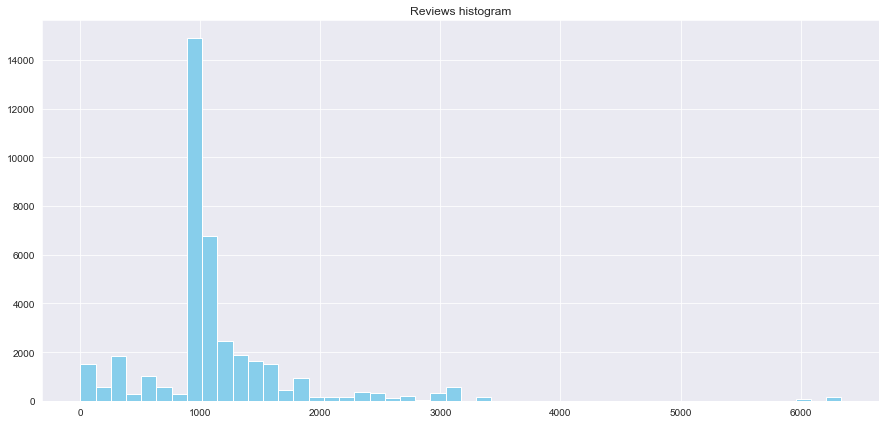

In [57]:
plt.figure(figsize = (15,7))
plt.hist('Review',data = expedia_df,bins = 50,color='skyblue')
plt.title('Reviews histogram')
plt.show()

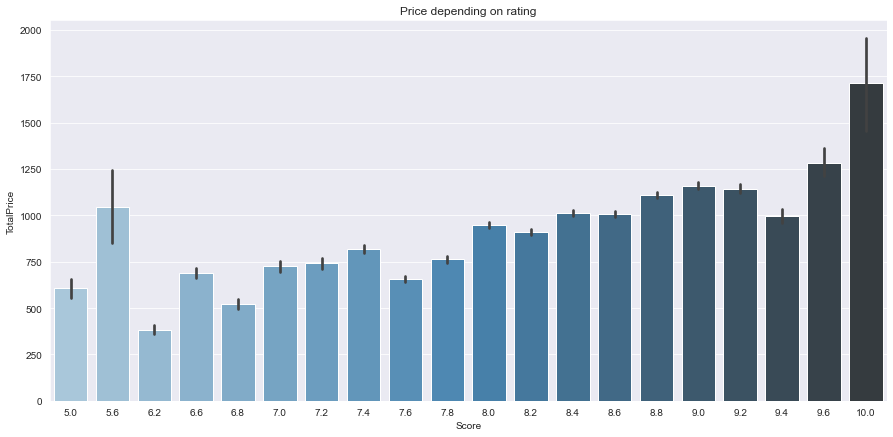

In [58]:
plt.figure(figsize = (15,7))
sns.barplot(x='Score',y='TotalPrice',data=expedia_df, palette='Blues_d')
plt.title('Price depending on rating')
plt.show()

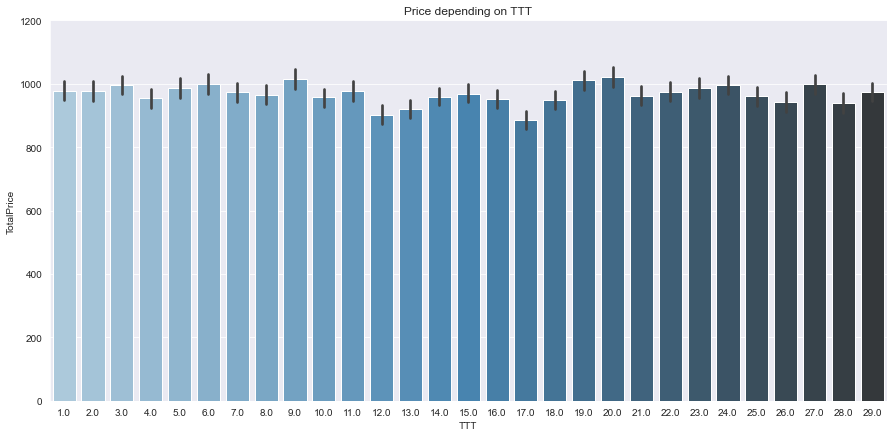

In [59]:
plt.figure(figsize = (15,7))
sns.barplot(x='TTT',y='TotalPrice',data=expedia_df, palette='Blues_d')
plt.title('Price depending on TTT')
plt.ylim(0, 1200)
plt.show()

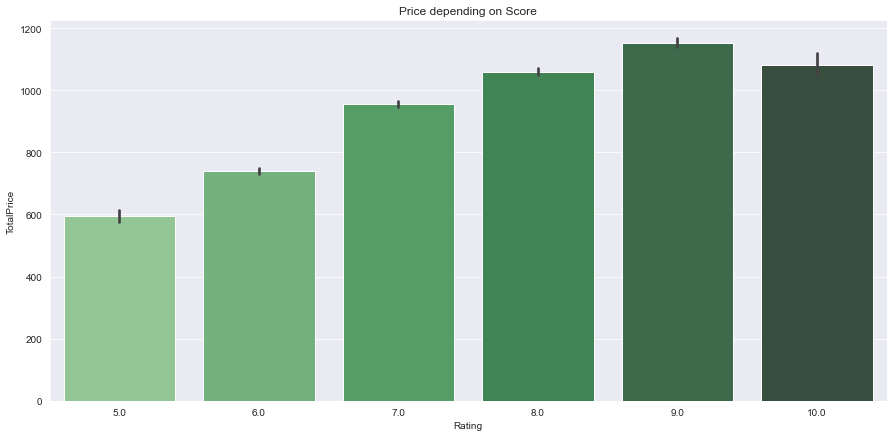

In [60]:
plt.figure(figsize = (15,7))
sns.barplot(x='Rating',y='TotalPrice',data=expedia_df, palette='Greens_d')
plt.title('Price depending on Score')
plt.show()

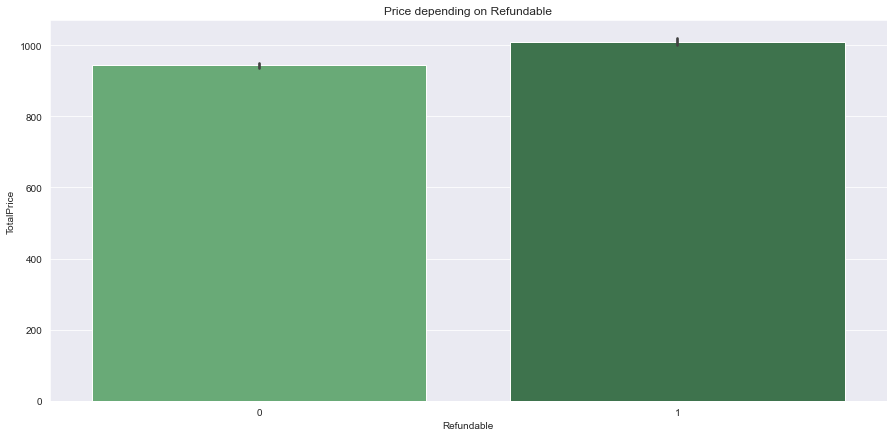

In [67]:
plt.figure(figsize = (15,7))
sns.barplot(x='Refundable',y='TotalPrice',data=expedia_df, palette='Greens_d')
plt.title('Price depending on Refundable')
plt.show()

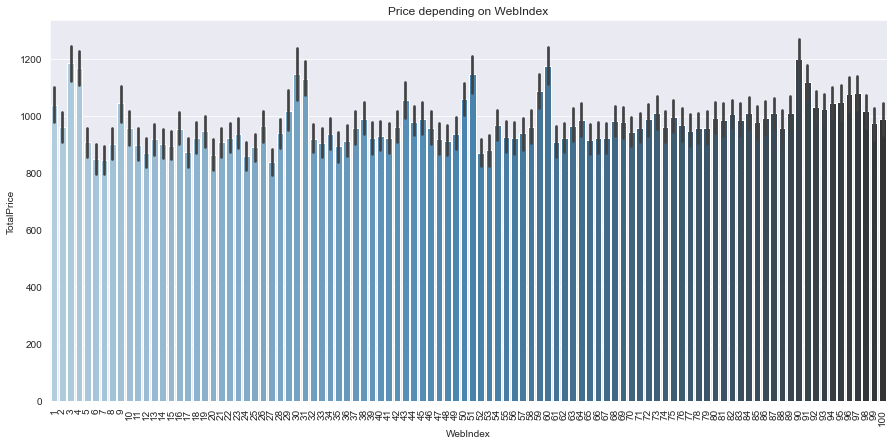

In [61]:
plt.figure(figsize = (15,7))
sns.barplot(x='WebIndex',y='TotalPrice',data=expedia_df, palette='Blues_d')
plt.title('Price depending on WebIndex')
plt.xticks(rotation= 90)
plt.show()

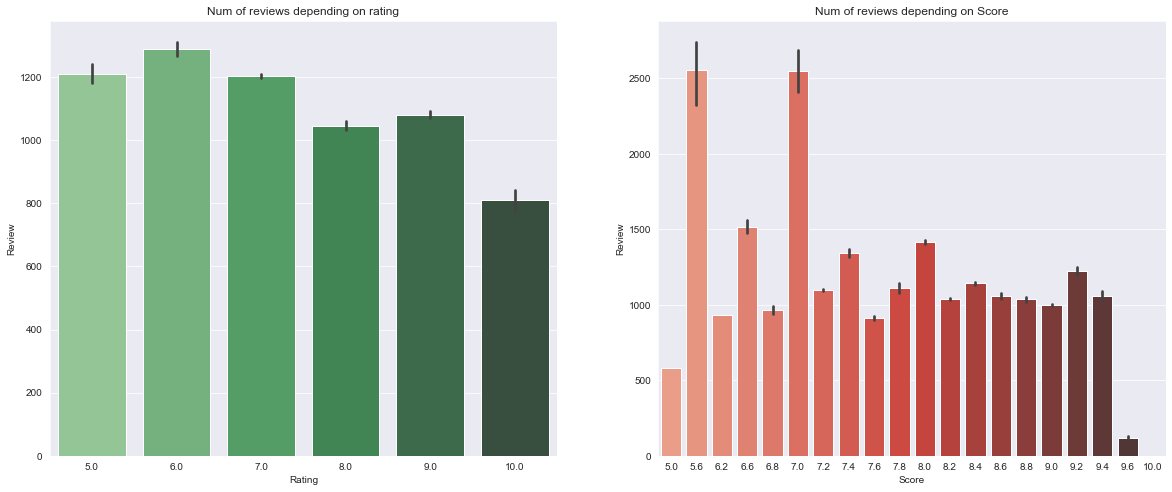

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.barplot(x='Rating',y='Review',data=expedia_df,ax=ax1, palette='Greens_d')
ax1.title.set_text('Num of reviews depending on rating')
sns.barplot(x='Score',y='Review',data=expedia_df,ax=ax2, palette='Reds_d')
ax2.title.set_text('Num of reviews depending on Score')
plt.show()

In [74]:
expedia_df_ol.columns

Index(['Name', 'NumOfWeekendDays', 'Nights', 'Score', 'Rating', 'Review',
       'Refundable', 'Price', 'WebIndex', 'Includes_Airport shuttle included',
       'Includes_Breakfast included', 'Includes_Kitchen', 'Includes_Pool',
       'District_Bronx', 'District_Brooklyn', 'District_Central New York City',
       'District_Chelsea', 'District_Entire home', 'District_Flushing',
       'District_Greenwich Village', 'District_Long Island City',
       'District_New York', 'District_Queens', 'District_SoHo',
       'District_Theater District', 'District_Upper West Side',
       'District_Williamsburg', 'SnapShotMonth', 'SnapShotDay', 'CheckinMonth',
       'CheckinDay', 'CheckoutMonth', 'CheckoutDay', 'TTT', 'LOS',
       'TotalPrice'],
      dtype='object')

In [75]:
expedia_df_district = expedia_df_ol[['District_Bronx','District_Brooklyn','District_Central New York City',
                                    'District_Chelsea','District_Entire home','District_Flushing',
                                    'District_Greenwich Village','District_Long Island City','District_New York',
                                    'District_Queens','District_SoHo','District_Theater District','District_Upper West Side',
                                    'District_Williamsburg']]

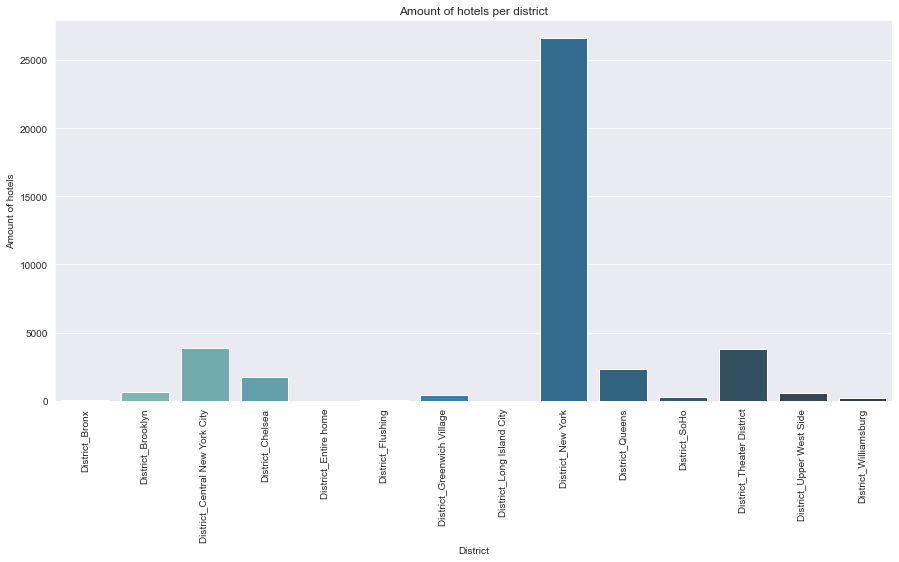

In [85]:
plt.figure(figsize = (15,7))
sums = expedia_df_district.sum(axis=0)
sns.barplot(x=sums.index, y=sums.values,palette='YlGnBu_d')
plt.xticks(rotation= 90)
plt.xlabel("District")
plt.ylabel("Amount of hotels")
plt.title("Amount of hotels per district")
plt.show()

In [63]:
expedia_grid = expedia_df[['NumOfWeekendDays','Nights','Includes_Breakfast included','Review',
                             'Score','Refundable','TotalPrice','Rating','SnapShotMonth',
                             'SnapShotDay','CheckinMonth','CheckinDay','CheckoutMonth','CheckoutDay','Includes_Kitchen',
                             'TTT','LOS','Price']]

In [64]:
expedia_grid

,NumOfWeekendDays,Nights,Includes_Breakfast included,Review,Score,Refundable,TotalPrice,Rating,SnapShotMonth,SnapShotDay,CheckinMonth,CheckinDay,CheckoutMonth,CheckoutDay,Includes_Kitchen,TTT,LOS,Price
0,0,1.0,0,1000,9.0,1,347.0,9.0,3.0,1.0,3.0,2.0,3.0,3.0,0,1.0,2.0,347
1,0,1.0,1,1338,8.6,1,381.0,8.0,3.0,1.0,3.0,2.0,3.0,3.0,0,1.0,2.0,381
2,0,1.0,0,1002,7.6,0,287.0,6.0,3.0,1.0,3.0,2.0,3.0,3.0,0,1.0,2.0,287
3,0,1.0,0,1447,8.0,0,446.0,7.0,3.0,1.0,3.0,2.0,3.0,3.0,0,1.0,2.0,446
4,0,1.0,1,1216,7.6,0,181.0,6.0,3.0,1.0,3.0,2.0,3.0,3.0,0,1.0,2.0,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40509,2,5.0,0,1000,9.0,1,1840.0,9.0,3.0,3.0,4.0,1.0,4.0,6.0,0,29.0,6.0,368
40510,2,5.0,0,1001,8.8,1,1900.0,8.0,3.0,3.0,4.0,1.0,4.0,6.0,0,29.0,6.0,380
40511,2,5.0,0,223,9.2,0,1975.0,9.0,3.0,3.0,4.0,1.0,4.0,6.0,0,29.0,6.0,395
40512,2,5.0,0,1000,9.0,1,2560.0,9.0,3.0,3.0,4.0,1.0,4.0,6.0,0,29.0,6.0,512


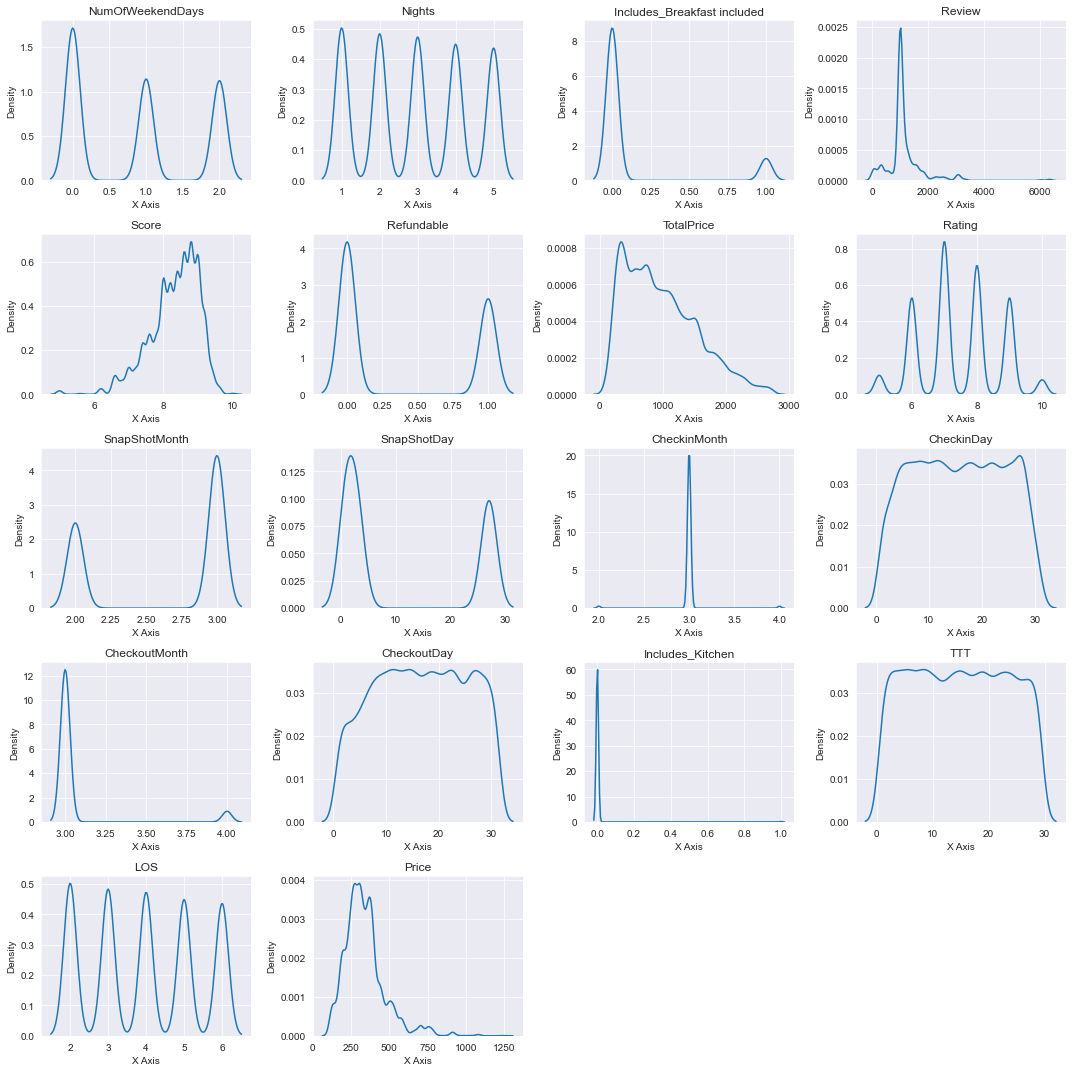

In [65]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(expedia_grid.columns):
    sns.kdeplot(expedia_grid[col], ax=axs[i])
    axs[i].set_title(col)
for ax in axs:
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Density")
    
for i in range(len(expedia_grid.columns), len(axs)):
    fig.delaxes(axs[i])

    
fig.tight_layout()
plt.show()